In [106]:
include("functions/retrieve_nsrdb_data.jl");
using PyCall

In [102]:
# This function will, when provided (latitude, longitude, year), will provide the corresponding NSRDB data
nsrdb_data_frame = get_nsrdb_raw_solar_data(9.817934, -84.070552, 2010);
show(nsrdb_data_frame)

      Year  Month  Day  Hour  ...  DNI  Wind Speed  Temperature  Solar Zenith Angle
0     2010      1    1     0  ...    0         0.1           17              162.14
1     2010      1    1     1  ...    0         0.1           16              150.52
2     2010      1    1     2  ...    0         0.1           16              137.27
3     2010      1    1     3  ...    0         0.2           16              123.57
4     2010      1    1     4  ...    0         0.2           16              109.78
5     2010      1    1     5  ...    0         0.2           16               96.04
6     2010      1    1     6  ...  277         0.2           17               82.49
7     2010      1    1     7  ...  637         0.2           18               69.32
8     2010      1    1     8  ...  791         0.2           20               56.84
9     2010      1    1     9  ...   47         0.2           21               45.65
10    2010      1    1    10  ...  937         0.2           22             

In [3]:
# Print out the column names that the data actually follows:
columns(nsrdb_data_frame)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'GHI', 'DHI', 'DNI',
       'Wind Speed', 'Temperature', 'Solar Zenith Angle'],
      dtype='object')


In [4]:
py"""
import sys
sys.path.insert(0, "./functions")
"""

In [5]:
call_ssc_with_dataframe = pyimport("nsrdb_python")["call_ssc_with_dataframe"]

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[5]:1
└ @ Core In[5]:1


PyObject <function call_ssc_with_dataframe at 0x12b60c9d8>

In [103]:
# This adds a "Generation" column to the provided data frame
call_ssc_with_dataframe(nsrdb_data_frame);

 0.00 %  @ 0
 0.67 %  @ 175
 1.34 %  @ 350
 2.00 %  @ 525
 2.67 %  @ 700
 3.33 %  @ 875
 4.00 %  @ 1050
 4.67 %  @ 1225
 5.33 %  @ 1400
 6.00 %  @ 1575
 6.66 %  @ 1750
 7.33 %  @ 1925
 7.99 %  @ 2100
 8.66 %  @ 2275
 9.33 %  @ 2450
 9.99 %  @ 2625
10.66 %  @ 2800
11.32 %  @ 2975
11.99 %  @ 3150
12.66 %  @ 3325
13.32 %  @ 3500
13.99 %  @ 3675
14.65 %  @ 3850
15.32 %  @ 4025
15.99 %  @ 4200
16.65 %  @ 4375
17.32 %  @ 4550
17.98 %  @ 4725
18.65 %  @ 4900
19.32 %  @ 5075
19.98 %  @ 5250
20.65 %  @ 5425
21.31 %  @ 5600
21.98 %  @ 5775
22.64 %  @ 5950
23.31 %  @ 6125
23.98 %  @ 6300
24.64 %  @ 6475
25.31 %  @ 6650
25.97 %  @ 6825
26.64 %  @ 7000
27.31 %  @ 7175
27.97 %  @ 7350
28.64 %  @ 7525
29.30 %  @ 7700
29.97 %  @ 7875
30.64 %  @ 8050
31.30 %  @ 8225
31.97 %  @ 8400
32.63 %  @ 8575
33.30 %  @ 8750


In [104]:
show(nsrdb_data_frame)

      Year  Month  Day  ...  Temperature  Solar Zenith Angle  Generation
0     2010      1    1  ...           17              162.14    0.000000
1     2010      1    1  ...           16              150.52    0.000000
2     2010      1    1  ...           16              137.27    0.000000
3     2010      1    1  ...           16              123.57    0.000000
4     2010      1    1  ...           16              109.78    0.000000
5     2010      1    1  ...           16               96.04    0.000000
6     2010      1    1  ...           17               82.49    0.000000
7     2010      1    1  ...           18               69.32    0.000000
8     2010      1    1  ...           20               56.84    0.000000
9     2010      1    1  ...           21               45.65    0.000000
10    2010      1    1  ...           22               36.97    0.000000
11    2010      1    1  ...           22               32.86    0.000000
12    2010      1    1  ...           22           

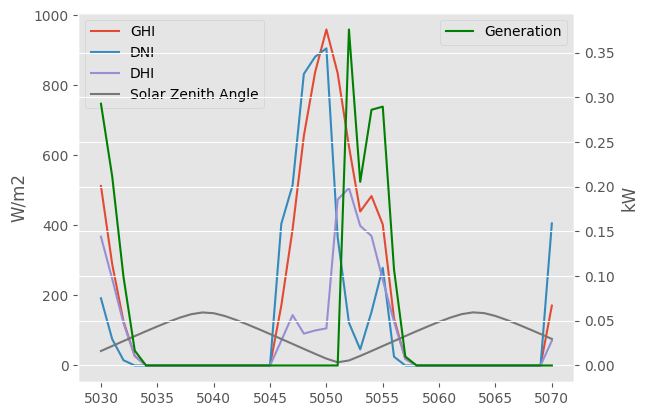

PyObject <matplotlib.legend.Legend object at 0x139326f28>

In [107]:
plot_pysam_output(nsrdb_data_frame)